##### Authors 
- Daniel Jove Díaz
- Pablo Fuentes Chemes

# CUSTOM CONVOLUTIONAL NEURAL NETWORKS

In this practice, we will develop a custom convolutional neural network from scratch to tackle the classification problem posed by the CIFAR100 dataset. The CIFAR100 dataset consists of 60,000 32x32 color images in 100 different classes, with 600 images per class. The goal is to build a model that can accurately classify these images into their respective categories.

We will start by defining the architecture of our custom CNN, followed by training the model on the CIFAR100 dataset.Then, we will try to improve their performance by using regularization technieques. Finally, we will evaluate the performance of our model and analyze the results.


### LOAD THE DATASET


The CIFAR-100 dataset is loaded using TensorFlow's `tf.keras.datasets.cifar100.load_data()` function. The dataset is split into training and testing sets, with `x_train` and `y_train` representing the training images and labels, and `x_test` and `y_test` representing the testing images and labels. The `label_mode="coarse"` parameter indicates that the dataset should be loaded with coarse labels, which group the 100 classes into 20 superclasses.

The shapes of the training and testing data are printed to provide an overview of the dataset dimensions. This helps in understanding the number of samples and the structure of the data.

Finally, the number of unique labels in the training set is calculated and printed. 


In [27]:
import tensorflow as tf

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

# Print the shape of the data
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')
num_classes = len(set(y_train.flatten()))
print(f'Number of different labels: {num_classes}')

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Number of different labels: 20


### DATASET PREPROCESSING

The code performs preprocessing on the CIFAR-100 dataset.

1. **Convert labels to categorical format**:
    - `to_categorical` is a function from `tensorflow.keras.utils` that converts class vectors (integers) to binary class matrices.
    - `y_train` and `y_test` are the original labels in integer format.
    - `num_classes` is the total number of classes (20 in this case).
    - The result is `y_train_categorical` and `y_test_categorical`, which are one-hot encoded representations of the labels.

2. **Normalize the pixel values**:
    - The pixel values of the images are originally in the range [0, 255].
    - The code converts the pixel values to `float32` and then normalizes them to the range [0, 1] by dividing by 255.0.
    - This normalization helps in faster convergence during training.

3. **Print the shapes of the preprocessed data**:
    - This prints the shapes of the normalized training and testing data, as well as the shapes of the one-hot encoded labels.
    - It provides an overview of the data dimensions after preprocessing.


In [28]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


### Create a validation dataset

Split the train set in two subsets: train and validation. The 20% was chosen to have the same number of images in the validation and test sets.

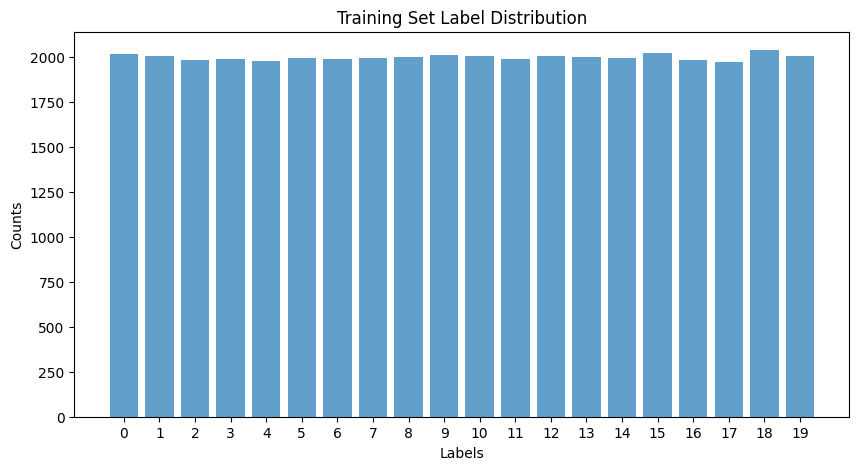

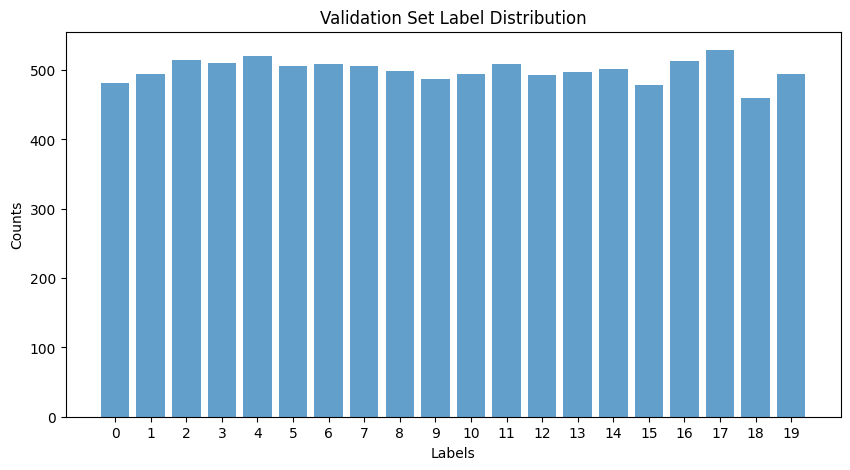

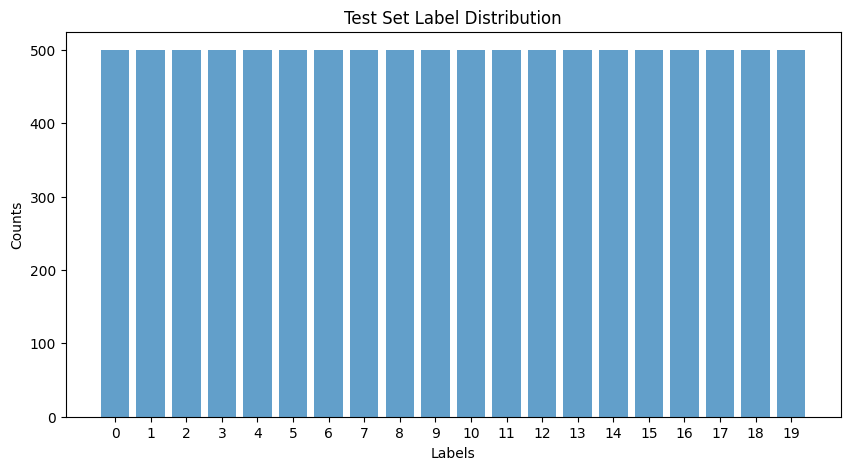

New training data shape: (40000, 32, 32, 3), New training labels shape: (40000, 1)
Validation data shape: (10000, 32, 32, 3), Validation labels shape: (10000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

def plot_label_distribution(y, title):
    labels, counts = np.unique(y, return_counts=True)
    labels = labels.astype(int)  # Ensure labels are integers
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, align='center', alpha=0.7)
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(labels)  # Ensure x-axis shows integer labels
    plt.show()

# Plot label distribution for training, validation, and test sets
plot_label_distribution(y_train, 'Training Set Label Distribution')
plot_label_distribution(y_val, 'Validation Set Label Distribution')
plot_label_distribution(y_test, 'Test Set Label Distribution')
#
print(f'New training data shape: {x_train.shape}, New training labels shape: {y_train.shape}')
print(f'Validation data shape: {x_val.shape}, Validation labels shape: {y_val.shape}')
print(f'Test data shape: {x_val.shape}, Test labels shape: {y_val.shape}')


## Develop the custom neural network

Fistly, a small CNN has been developed. The model is made up  of two convolutional layers, with a maxpooling layer between them. The features extracted by this layers are flattened in order to convert them into an entry of a dense layer with softmax output.

In [38]:
import keras 
from keras import layers 


inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=3)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(20, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 20)             │        20,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,892 (85.52 KB)

 Trainable params: 21,892 (85.52 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/U3-CNNs/dogs-vs-cats_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=60,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/60


2025-02-28 17:54:17.175216: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_382', 32 bytes spill stores, 32 bytes spill loads

2025-02-28 17:54:17.415468: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_382', 32 bytes spill stores, 32 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1526 - loss: 2.7469 - val_accuracy: 0.2685 - val_loss: 2.3909
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2810 - loss: 2.3620 - val_accuracy: 0.2922 - val_loss: 2.3010
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3095 - loss: 2.2598 - val_accuracy: 0.3220 - val_loss: 2.2202
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3338 - loss: 2.1750 - val_accuracy: 0.3290 - val_loss: 2.1884
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3519 - loss: 2.1311 - val_accuracy: 0.3337 - val_loss: 2.1790
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3679 - loss: 2.0646 - val_accuracy: 0.3448 - val_loss: 2.1452
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3782 - loss: 2.0370 - val_accuracy: 0.3645 - val_loss: 2.0811
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3908 - loss: 1.9907 - val_accuracy: 0.3711 - val

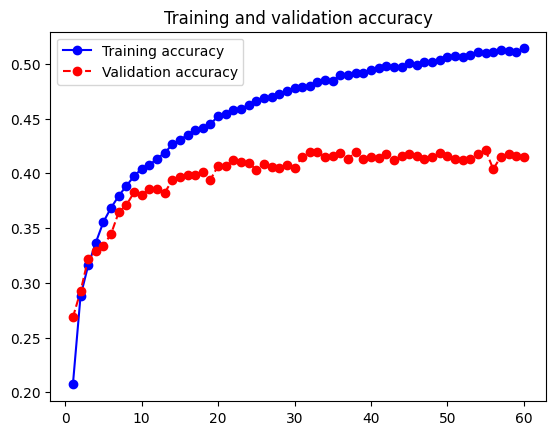

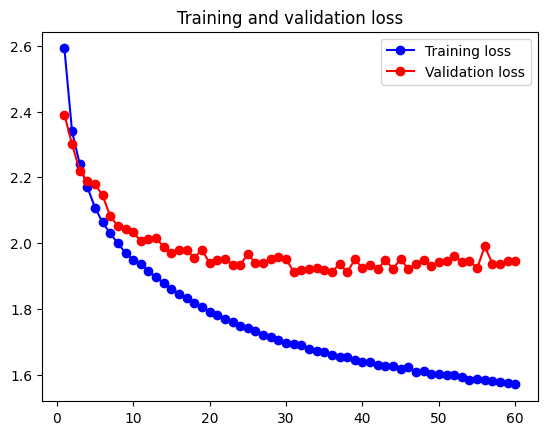

In [40]:
from utils import plot
plot(history)

This small network is not capturing well the features of the images to classify them. So, a more complex architecture can be tried to attempt to get a model with more classification capabilities.

In [54]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(20, activation="softmax")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.summary()
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,100 (1.37 MB)

 Trainable params: 358,100 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model2.fit(
    x_train, y_train,
    batch_size= 128,
    epochs=60,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle = True)

Epoch 1/60


2025-02-28 18:14:03.027553: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_494', 32 bytes spill stores, 32 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1803 - loss: 2.6505 - val_accuracy: 0.3143 - val_loss: 2.2284
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3472 - loss: 2.1065 - val_accuracy: 0.3885 - val_loss: 1.9802
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4164 - loss: 1.8778 - val_accuracy: 0.4354 - val_loss: 1.8075
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4606 - loss: 1.7320 - val_accuracy: 0.4599 - val_loss: 1.7592
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4934 - loss: 1.6176 - val_accuracy: 0.4726 - val_loss: 1.6962
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5272 - loss: 1.5019 - val_accuracy: 0.4915 - val_loss: 1.6642
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5590 - loss: 1.4034 - val_accuracy: 0.4966 - val_loss: 1.6425
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5781 - loss: 1.3305 - val_accuracy: 0.4988 - val

The second model, `model2`, has a more complex architecture compared to the first model. It consists of three convolutional layers with increasing filter sizes, followed by max-pooling layers, and a dense layer before the output layer. This increased complexity allows the model to capture more intricate features from the CIFAR-100 dataset.